# Statistics & Public Health 1: Cleaning and EDA

In [1]:
# library for arrays of data
import numpy as np
# library for data manipulation and analysis
import pandas as pd 
# library for plotting data 
import matplotlib.pyplot as plt 
# another library for plotting data
import seaborn as sns
# library to modify dates in datetime format
import datetime as dt

## Part 1 - Basic Data Wrangling


In [2]:
# load mosquito_data.csv
mosquitoData = pd. read_csv('mosquito_data.csv')

# QUESTION 1: find and print the shape of the mosquitoData
print('mosquitoData shape: ' + str(mosquitoData.shape))
print('')
# original dataframe
print(mosquitoData.info())

mosquitoData shape: (18495, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB
None


### _QUESTION 1:  Find shape of Mosquito Data_
<font color=indigo> The shape of the mosquito dataframe is **18,495 rows** and **13 columns**. </font>

In [3]:
# convert Date column in mosquitoData to a datatime format
mosquitoData['Date'] = pd.to_datetime(mosquitoData['Date'])

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64

count    18495.000000
mean        54.314788
std         36.712796
min          1.000000
25%         22.000000
50%         51.000000
75%         89.000000
max        132.000000
Name: Block, dtype: float64


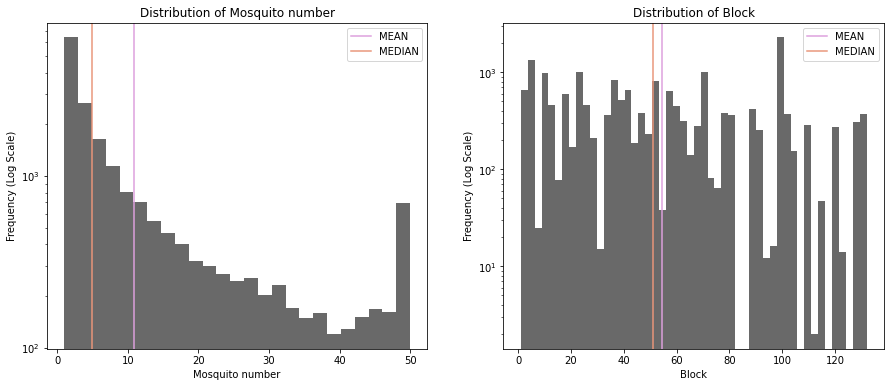

In [4]:
# QUESTION 2: pick 2 numeric columns to determine what data is being stored and how is it being ditributed

# 1st numeric column: Mosquito number
num1 = mosquitoData['Mosquito number']
num1_summary_stats = num1.describe()
print(num1_summary_stats)
print('')

# 2nd numeric column: Block
num2 = mosquitoData['Block']
num2_summary_stats = num2.describe()
print(num2_summary_stats)

# create 2 histograms representing the distribution of the 2 numeric columns
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2)
# histogram 1: Distribution of Mosquito number
ax0.hist(num1, 25, histtype='bar', color= 'dimgray',log=True)
ax0.axvline(num1.mean(),color="plum",label ="MEAN")
ax0.axvline(num1.median(),color="darksalmon",label ="MEDIAN")
ax0.set_title('Distribution of Mosquito number')
ax0.set_xlabel('Mosquito number')
ax0.set_ylabel('Frequency (Log Scale)')
ax0.legend()

# histogram 2: Distribution of Block
ax1.hist(num2, 50, histtype='bar', color= 'dimgray',log=True)
ax1.axvline(num2.mean(),color="plum",label ="MEAN")
ax1.axvline(num2.median(),color="darksalmon",label ="MEDIAN")
ax1.set_title('Distribution of Block')
ax1.set_xlabel('Block')
ax1.set_ylabel('Frequency (Log Scale)')
ax1.legend()

fig.set_size_inches(15,6)

### _QUESTION 2:  Distributions for 2 Numeric Columns and Findings_
<font color=indigo> 
    The following numeric columns are being analyzed to determine what data is being stored and how it is distributed: 
    
- The **mosquito number** is storing the number of mosquitoes caught in a trap represented by an **int64** data type.
    - The most frequent number of mosquitos being caught is skewed towards the right side of the statistical distribution, specifically **ranging between 1 to 20**. 
    - Despite the distribution being right skewed, the calculated **mean was greater than the median**. This skew can impact what kind of outliers and trends can be identified when catching mosquitos.    
- The **Block** is storing the Block number of address represented by an **int64** data type.
    - The most frequent block number of address trapping mosquitos is on or **close to 100**. 
    - There are **omitted blocks** in this dataframe, ranging within **block 80 and 140**. Additional information and/or research would be recommended to determine why certain block are missing in the dataframe.   
    - The data is **not skewed** towards a certain direction, establishing a challenge to identify anomalies and trends for further analysis. This distribution would be considered **symmetric**. 
    - This symmetric distribution would result in the calculated **mean, median, and mode close to block 50**. </font>

count      18495
unique         4
top       GRAVID
freq       17741
Name: Trap type, dtype: object

count              18495
unique                 4
top       CULEX RESTUANS
freq               11866
Name: Species, dtype: object


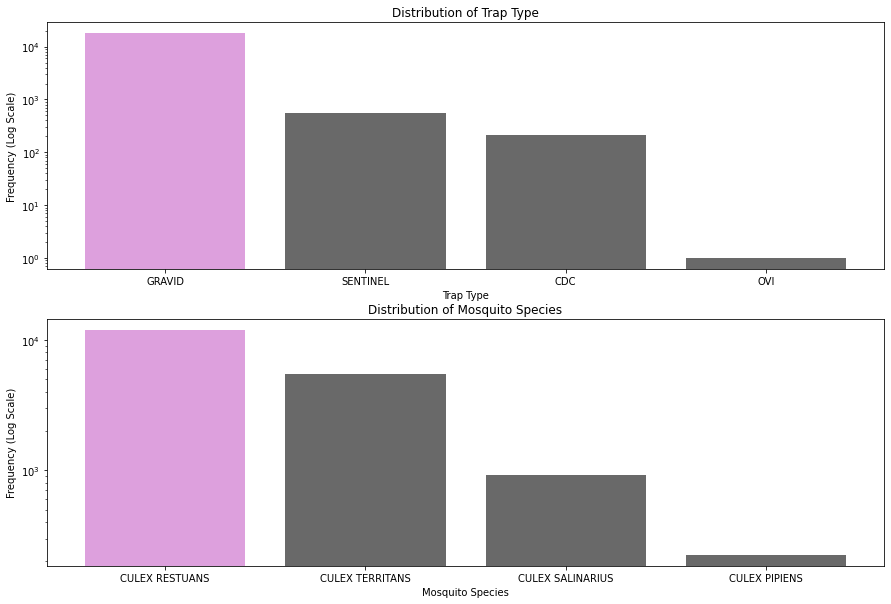

In [5]:
# QUESTION 2(cont.): 2 two categorical columns to determine what data is being stored and how is it being ditributed

# 1st categorical column: Trap type
cat1 = mosquitoData['Trap type']
cat1_summary_stats = cat1.describe()
print(cat1_summary_stats)
print('')

# 2nd categorical column: Species
cat2 = mosquitoData['Species']
cat2_summary_stats = cat2.describe()
print(cat2_summary_stats)

# create 2 bat charts representing the distribution of the 2 two categorical columns
fig, ((ax0),(ax1)) = plt.subplots(nrows=2, ncols=1)
# bar plot 1: Distribution of Trap Type
xTrapTypeName = cat1.unique()
yTrapTypeCount = cat1.value_counts()
ax0.bar(xTrapTypeName, yTrapTypeCount,color= ['plum','dimgray','dimgray','dimgray'], log=True)
ax0.set_title('Distribution of Trap Type')
ax0.set_xlabel('Trap Type')
ax0.set_ylabel('Frequency (Log Scale)')

# bar plot 2: Distribution of Mosquito Species
xSpeciesName = cat2.unique()
ySpeciesCount = cat2.value_counts()
ax1.bar(xSpeciesName, ySpeciesCount, color= ['plum','dimgray','dimgray','dimgray'], log=True)
ax1.set_title('Distribution of Mosquito Species')
ax1.set_xlabel('Mosquito Species')
ax1.set_ylabel('Frequency (Log Scale)')

fig.set_size_inches(15,10)

### _QUESTION 2(cont.): Distributions for 2 Categorical Columns and Findings_

<font color="indigo">
    
The following categorical columns are being analyzed to determine what data is being stored and how it is distributed:

- The **Trap type** is storing the Type of trap represented by an **object** data type.
    - There are 4 unique categories: GRAVID, SENTINAL, CDC, OVI
    - **GRAVID** is the most common trap type used on mosquitos between 2008 and 2019.
    - Future relationship analysis with Trap Type will have GRAVID as the largest sample to compare against other data. 
- The **Species** is storing Mosquito species represented by an **object** data type.
    - There are 4 unique categories: CULEX RESTUANS, CULEX TERRITANS, CULEX SALINARIUS, CULEX PIPIENS
    - **CULEX RESTUANS** is the most common mosquito species caught between 2008 and 2019.
    - Future relationship analysis with Mosquito species will have CULEX RESTUANS as the largest sample to compare against other data.

In [6]:
# QUESTION 3: find and remove duplicate columns in mosquitoData
# remove duplicate column Mosquito ID
mosquitoData = mosquitoData.drop(['Mosquito ID'],axis = 1)
# remove duplicate column Address Block
mosquitoData = mosquitoData.drop(['Address Block'],axis = 1)
# updated dataframe shape without Mosquito ID and Address Block column
mosquitoData.shape

(18495, 12)

### _QUESTION 3: remove Duplicate column(s)_
<font color=indigo> The Mosquito ID and Species columns in mosquitoData store duplicate values. The **Mosquito ID** column was dropped to remove redundancy. The Block and Address Block columns in mosquitoData store duplicate values. The **Address Block** column was removed to remove redundancy. </font>

In [7]:
# QUESTION 4: find and deal with columns containing Nan values
print(mosquitoData.isna().sum())

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64


In [8]:
# calculate percentage of the missing values in Lat and Lon column
percentNanLat = round(mosquitoData["Lat"].isna().sum() / mosquitoData.shape[0] *100)
percentNanLon = round(mosquitoData["Lat"].isna().sum() / mosquitoData.shape[0] *100)
print(f"Percentage of missing values for Lat Data: {percentNanLat}%")
print(f"Percentage of missing values for Lon Data: {percentNanLat}%")
# Since 16% of the Lat and Lon data is missing, it must be replace and not deleted   

Percentage of missing values for Lat Data: 16%
Percentage of missing values for Lon Data: 16%


In [9]:
# fill Nan values in Lat and Lon with their respective mean values
mosquitoData['Lat'] = mosquitoData['Lat'].fillna(mosquitoData['Lat'].mean())
mosquitoData['Lon'] = mosquitoData['Lon'].fillna(mosquitoData['Lon'].mean())
# updated dataframe without Nan values in Lat and Lon
print(f"Count of Nan values in Lat column: {mosquitoData['Lat'].isna().sum()}")
print(f"Count of Nan values in Lon column: {mosquitoData['Lon'].isna().sum()}" )

Count of Nan values in Lat column: 0
Count of Nan values in Lon column: 0


### _QUESTION 4: remove Nan Values_
<font color=indigo> The Nan values appeared in the **Lat** and **Lon** columns. The Nan values were **replaced with the average** of the respective columns. </font>

## Part 2 - Exploratory Data Analysis

### _QUESTION 1: Relationship between Mosquito Number and Date_

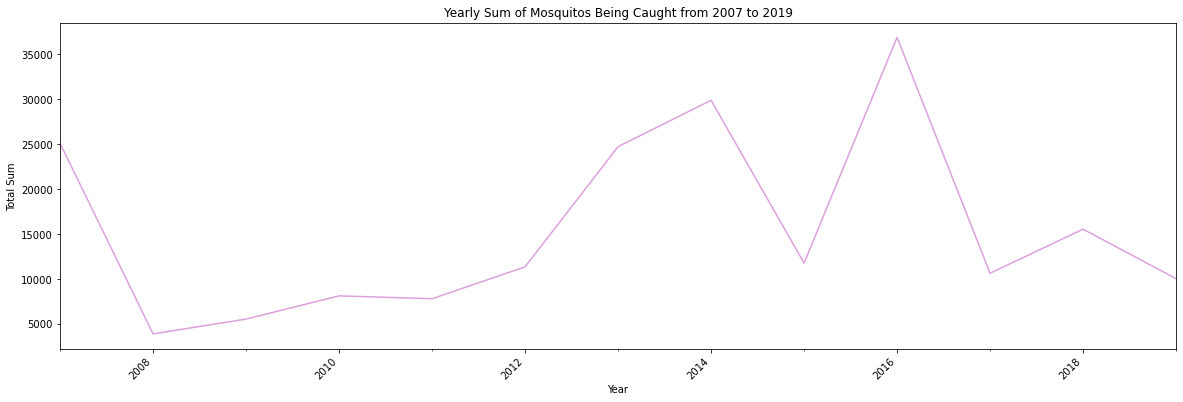

In [10]:
# Sum the Mosquito number based on Year
sumYearMosquitoData = mosquitoData.groupby(mosquitoData['Date'].dt.to_period('Y'))["Mosquito number"].sum().reset_index()
# labels title, x-axis, and y-axis for upcoming plot
titleCount = "Yearly Sum of Mosquitos Being Caught from 2007 to 2019"
xAxis = "Year"
yAxis = "Total Sum"

# line graph Total Count of Mosquitos Being Caught from 2008 to 2019
sumYearMosquitoData.plot(x='Date', y='Mosquito number',kind="line",figsize = (20,6),legend=False,title = titleCount, xlabel=xAxis, ylabel=yAxis, color="plum")

# modify display of x ticks
plt.xticks(rotation=45, ha='right')

# display plot
plt.show()

In [11]:
# statistical summary of the Sum the Mosquito number based on Year
sumYearMosquitoData.describe() 

,Mosquito number
count,13.000000
mean,15478.769231
std,10307.739828
min,3882.000000
25%,8115.000000
50%,11342.000000
75%,24724.000000
max,36893.000000


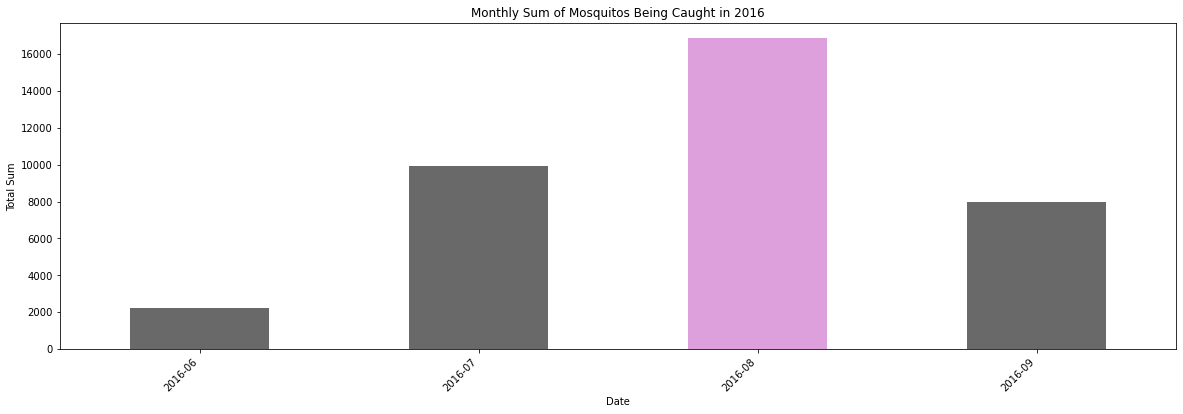

In [12]:
# Sum the Mosquito number based on Month in 2016
sumMonthMosquitoData = mosquitoData.groupby(mosquitoData['Date'].dt.to_period('M'))["Mosquito number"].sum().reset_index()
sumMonthMosquitoData = sumMonthMosquitoData[(sumMonthMosquitoData['Date'] > "2016-01") & (sumMonthMosquitoData['Date']< "2016-12")]

# labels title, x-axis, and y-axis for upcoming plot
titleCount = "Monthly Sum of Mosquitos Being Caught in 2016"
xAxis = "Year-Month"
yAxis = "Total Sum"

# Colors: Default color for all bars
# Highlight the upcoming 2016 bar
colors = ['dimgray', 'dimgray', 'plum', 'dimgray']  

# plot Total Count of Mosquitos Being Caught from 2008 to 2019
sumMonthMosquitoData.plot(x='Date', y='Mosquito number',kind="bar",figsize = (20,6),legend=False,title = titleCount, ylabel=yAxis, color=colors)

# modify display of x ticks
plt.xticks(rotation=45, ha='right')

# display plot
plt.show()

In [13]:
# statistical summary of the Sum the Mosquito number based on Month in 2016
sumMonthMosquitoData.describe() 

,Mosquito number
count,4.00000
mean,9223.25000
std,6038.30475
min,2202.00000
25%,6512.25000
50%,8926.00000
75%,11637.00000
max,16839.00000


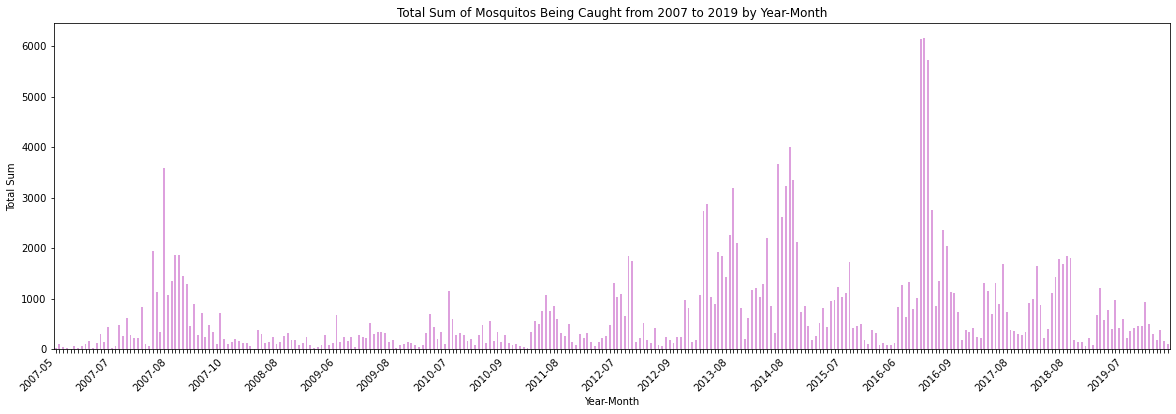

In [14]:
# Sum the Mosquito number based on Year and Month
sumMosquitoData = mosquitoData.groupby("Date")["Mosquito number"].sum().reset_index()
sumMosquitoData["Date"] = sumMosquitoData["Date"].dt.strftime('%Y-%m')

# plot Total Count of Mosquitos Being Caught from 2008 to 2019
titleCount = "Total Sum of Mosquitos Being Caught from 2007 to 2019 by Year-Month"
xAxis = "Year-Month"
yAxis = "Total Sum"
sumMosquitoData.plot(x='Date', y='Mosquito number',kind="bar",figsize = (20,6),legend=False,title = titleCount, xlabel = xAxis, ylabel=yAxis, color="plum")

# modify x axis for readability
cur_axis = plt.gca()
labs = cur_axis.get_xticklabels()

for i, label in enumerate(labs):
    if i % 15 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.xticks(rotation=45, ha='right')

# display plot
plt.show()

#### QUESTION 1 Mosquito Number and Date Findings

<font color='indigo'> From 2007 to 2019, the most number of mosquitos caught was **over 36,000** in the year **2016**. Broken down further, the month of **August** greatly contributed to the total sum of mosquitos caughts in 2016 with **over 16,000**. The number of mosquitos caught from 2009 to 2012 was steadily increasing. From 2013 to 2019 the trend of mosquitos being caught had significant sudden increases and decreases, notably 2016. A note regarding the data collection is that only months between June and September had mosquitos caught and documented. Further research is recommended to determine why August 2016 caught the most mosquitos between 2007 to 2019. </font>

### _QUESTION 2: Relationship between Mosquito Species and WNV Prevalence_

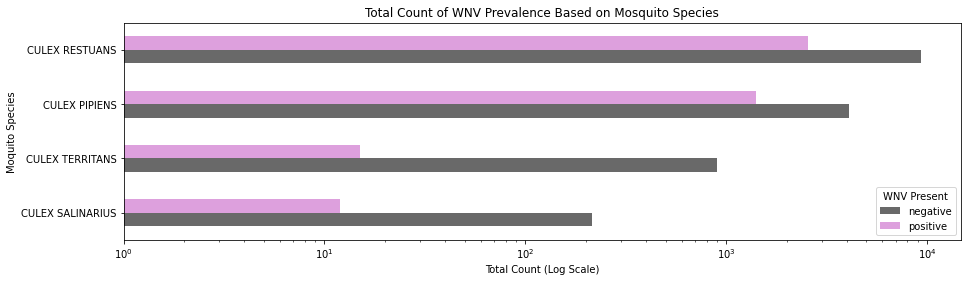

In [15]:
# count the data based on Mosquito species and WNV prevalence
mosquitoDataWNV = mosquitoData.groupby(["Species","WNV Present"])['Species'].count().unstack().sort_values("positive",ascending=True)

# create a horizontal bar graph for the Mosquito species and WNV prevalence relationship
mosquitoDataWNV.plot(kind="barh",color=['dimgray', 'plum'],figsize=(15,4),log=True)
plt.title("Total Count of WNV Prevalence Based on Mosquito Species")
plt.ylabel("Moquito Species")
plt.xlabel("Total Count (Log Scale)")
plt.show()

#### Question 2 Total Count of WNV Prevalence Based on Mosquito Species Findings

<font color='indigo'>The chances of West Nile Virus appearing in the Culex Restuans and Culex Pipiens species was over doubled compared to the Culex Territan and Culex Salinarius species. A note regarding the data collection is that once a trap had one moquito tested positive for West Nile Virus, the whole batch is considered positive. Many mosquitos caught could have been tested negative in a batch where only one mosquito was tested positive. Further research should be conducted to determine why the Culex Restuans and Culex Pipiens species is more likely to contain the West Nile Virus than the Culex Territan and Culex Salinarius species. </font> 